In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import pandas as pd

# Read the dataset into a pandas dataframe
df = pd.read_csv('/kaggle/input/ciscodataset/PLID_Bookings_Problem1.csv')

# Drop the 'Product Family' column as it is not needed for the analysis
df.drop('Product Family', axis=1, inplace=True)

# Split 'Fiscal Quarter' into 'Quarter' and 'Year' columns
df[['Quarter', 'Year']] = df['Fiscal Quarter'].str.split(' ', expand=True)

# Drop the 'Fiscal Quarter' column as it is no longer needed
df.drop('Fiscal Quarter', axis=1, inplace=True)

# Extract the month from the 'Fiscal Month' column and create a new column called 'Month'
df['Month'] = df['Fiscal Month'].str.extract('([A-Z]+)', expand=False)

# Drop the 'Fiscal Month' column as it is no longer needed
df.drop('Fiscal Month', axis=1, inplace=True)

# Convert the 'Booking_Date' column to a pandas datetime object
df['Booking_Date'] = pd.to_datetime(df['Booking_Date'], format='%d-%m-%Y')

# Print the cleaned dataframe
print(df.head())


  Business Unit             PLID  Booked_Qty Booking_Date Quarter    Year  \
0         CSWBU  CBR-D121-DS-MOD         204   2016-08-01      Q1  FY2022   
1         CSWBU  CBR-D121-DS-MOD         564   2016-10-01      Q1  FY2022   
2         CSWBU  CBR-D121-DS-MOD        1476   2016-09-01      Q1  FY2022   
3         CSWBU  CBR-D121-DS-MOD         374   2017-08-01      Q1  FY2002   
4         CSWBU  CBR-D121-DS-MOD        6094   2017-10-01      Q1  FY2002   

  Month  
0   AUG  
1   OCT  
2   SEP  
3   AUG  
4   OCT  


In [6]:
df

,Business Unit,PLID,Booked_Qty,Booking_Date,Quarter,Year,Month
0,CSWBU,CBR-D121-DS-MOD,204,2016-08-01,Q1,FY2022,AUG
1,CSWBU,CBR-D121-DS-MOD,564,2016-10-01,Q1,FY2022,OCT
2,CSWBU,CBR-D121-DS-MOD,1476,2016-09-01,Q1,FY2022,SEP
3,CSWBU,CBR-D121-DS-MOD,374,2017-08-01,Q1,FY2002,AUG
4,CSWBU,CBR-D121-DS-MOD,6094,2017-10-01,Q1,FY2002,OCT
...,...,...,...,...,...,...,...
10991,RTOBU,C9800-40-K9,229,2020-06-01,Q4,FY2011,JUN
10992,RTOBU,C9800-40-K9,289,2020-05-01,Q4,FY2011,MAY
10993,RTOBU,C9800-40-K9,1231,2021-07-01,Q4,FY2012,JUL
10994,RTOBU,C9800-40-K9,591,2021-06-01,Q4,FY2012,JUN


### Convert Booking_Date column to datetime format
df['Booking_Date'] = pd.to_datetime(df['Booking_Date'])

# Extract month and year from Booking_Date column
df['Booking_Month'] = df['Booking_Date'].dt.month
df['Booking_Year'] = df['Booking_Date'].dt.year

In [100]:
df = df.drop(['Business Unit'], axis=1)
df=df.drop(['Year'], axis=1)

In [101]:
df.head()

,PLID,Booked_Qty,Booking_Date,Quarter,Month,Booking_Month,Booking_Year
0,CBR-D121-DS-MOD,204,2016-08-01,Q1,AUG,8,2016
1,CBR-D121-DS-MOD,564,2016-10-01,Q1,OCT,10,2016
2,CBR-D121-DS-MOD,1476,2016-09-01,Q1,SEP,9,2016
3,CBR-D121-DS-MOD,374,2017-08-01,Q1,AUG,8,2017
4,CBR-D121-DS-MOD,6094,2017-10-01,Q1,OCT,10,2017


In [93]:
df.head()

,PLID,Booked_Qty,Booking_Date,Quarter,Month,Booking_Month,Booking_Year
0,CBR-D121-DS-MOD,204,2016-08-01,Q1,AUG,8,2016
1,CBR-D121-DS-MOD,564,2016-10-01,Q1,OCT,10,2016
2,CBR-D121-DS-MOD,1476,2016-09-01,Q1,SEP,9,2016
3,CBR-D121-DS-MOD,374,2017-08-01,Q1,AUG,8,2017
4,CBR-D121-DS-MOD,6094,2017-10-01,Q1,OCT,10,2017
...,...,...,...,...,...,...,...
10991,C9800-40-K9,229,2020-06-01,Q4,JUN,6,2020
10992,C9800-40-K9,289,2020-05-01,Q4,MAY,5,2020
10993,C9800-40-K9,1231,2021-07-01,Q4,JUL,7,2021
10994,C9800-40-K9,591,2021-06-01,Q4,JUN,6,2021


In [ ]:
df.groupby

In [95]:
df.head()

,PLID,Booked_Qty,Booking_Date,Quarter,Month,Booking_Month,Booking_Year
0,CBR-D121-DS-MOD,204,2016-08-01,Q1,AUG,8,2016
1,CBR-D121-DS-MOD,564,2016-10-01,Q1,OCT,10,2016
2,CBR-D121-DS-MOD,1476,2016-09-01,Q1,SEP,9,2016
3,CBR-D121-DS-MOD,374,2017-08-01,Q1,AUG,8,2017
4,CBR-D121-DS-MOD,6094,2017-10-01,Q1,OCT,10,2017
...,...,...,...,...,...,...,...
10991,C9800-40-K9,229,2020-06-01,Q4,JUN,6,2020
10992,C9800-40-K9,289,2020-05-01,Q4,MAY,5,2020
10993,C9800-40-K9,1231,2021-07-01,Q4,JUL,7,2021
10994,C9800-40-K9,591,2021-06-01,Q4,JUN,6,2021


In [96]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(df['Booked_Qty'],order=(2,1,2),seasonal_order=(1,0,1,12))
results = model.fit()
results.summary()

ValueError: unrecognized data structures: <class 'pandas.core.groupby.generic.SeriesGroupBy'> / <class 'NoneType'>

In [17]:
# Analyze booking data by PLID
plid = df.groupby('PLID')['Booked_Qty'].sum()

# Display the top 10 PLIDs by booked quantity
top_plids = plid.nlargest(10)
print(top_plids)

PLID
CP-7841-K9        8058127
CP-7821-K9        7146092
GLC-TE            5781692
CP-8841-K9        5541884
CP-8851-K9        5067340
SFP-10G-LR        4314543
QSFP-40G-SR-BD    3054843
CP-8811-K9        2722947
SFP-10G-LR-S      2566380
C9120AXI-B        2480560
Name: Booked_Qty, dtype: int64


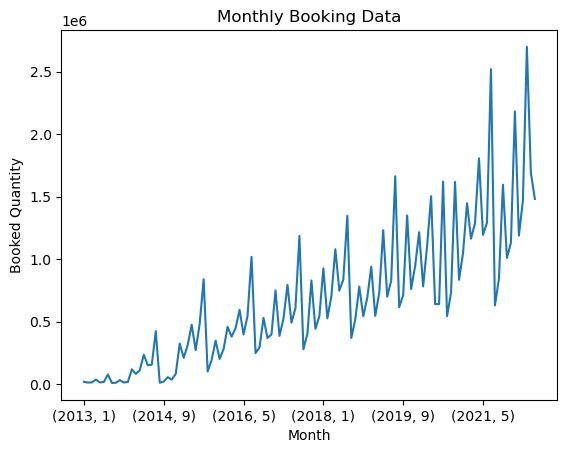

In [19]:
monthly_data = df.groupby(['Booking_Year', 'Booking_Month'])['Booked_Qty'].sum()

# Plot the monthly booking data
monthly_data.plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Booked Quantity')
plt.title('Monthly Booking Data')
plt.show()

In [20]:
# Group the data by PLID, year, and month, and sum the booked quantity for each group
monthly_data = df.groupby(['PLID', pd.Grouper(key='Booking_Date', freq='M')])['Booked_Qty'].sum().reset_index()

In [21]:
monthly_data.head()

,PLID,Booking_Date,Booked_Qty
0,8201-SYS,2021-01-31,19
1,8201-SYS,2021-02-28,4
2,8201-SYS,2021-03-31,3
3,8201-SYS,2021-04-30,25
4,8201-SYS,2021-05-31,10


In [22]:
# Split the data into training and testing sets
train_data = monthly_data[monthly_data['Booking_Date'] < '2017-06-01']
test_data = monthly_data[monthly_data['Booking_Date'] >= '2017-06-01']


In [25]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 22.3 MB/s eta 0:00:0000:010:01


In [29]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

def arima_func():
    print()
    arima_model = auto_arima(train_data['Booked_Qty'], exogenous=exog_vars, seasonal=False)
    print(arima_model.summary())
    
    


In [30]:
:
    # Define the exogenous variables (in this case, there are none)
exog_vars = None

# Define the range of parameters to search for the optimal model
arima_model = auto_arima(train_data['Booked_Qty'], exogenous=exog_vars, seasonal=False)


In [86]:

# Print the summary of the model
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1188
Model:               SARIMAX(5, 1, 5)   Log Likelihood              -13054.661
Date:                Sat, 25 Mar 2023   AIC                          26131.322
Time:                        14:13:20   BIC                          26187.193
Sample:                             0   HQIC                         26152.379
                               - 1188                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7678      0.060    -12.790      0.000      -0.885      -0.650
ar.L2          0.1891      0.062      3.063      0.002       0.068       0.310
ar.L3          0.8704      0.027     32.813      0.0

In [33]:
print(arima_model)

 ARIMA(5,1,5)(0,0,0)[0]          


In [37]:
# Generate the forecast for the test set
test_forecast = arima_model.predict(n_periods=len(test_data), exogenous=None)

# Calculate the mean absolute error (MAE) of the forecast
test_mae = np.mean(np.abs(test_forecast - test_data['Booked_Qty']))

# Print the MAE of the forecast
print(f'Test MAE: {test_mae:.2f}')


Test MAE: 10080.06


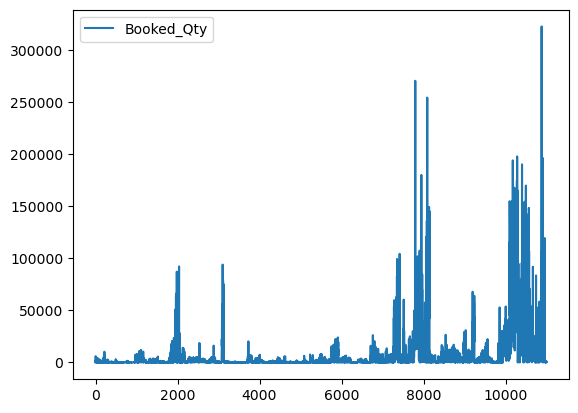

In [3]:

from pandas import read_csv
from matplotlib import pyplot
series = pd.read_csv('/kaggle/input/ciscodataset/PLID_Bookings_Problem1.csv')
series.plot()
pyplot.show()

In [4]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller

# Read the CSV file
data = pd.read_csv('/kaggle/input/ciscodataset/PLID_Bookings_Problem1.csv')

# Convert the "Booking_Date" column to a datetime object
data['Booking_Date'] = pd.to_datetime(data['Booking_Date'])

# Set the "Booking_Date" column as the index
data.set_index('Booking_Date', inplace=True)

# Extract the "Booked_Qty" column as a numpy array
qty = data['Booked_Qty'].values

# Perform the ADF test
result = adfuller(qty)

# Print the results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -6.133621
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
 
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
df_new = pd.read_csv('/kaggle/input/ciscodataset/PLID_Bookings_Problem1.csv')
df_utils_new=df_new[['Booking_Date','Booked_Qty']]
df_utils_new[:8]

,Booking_Date,Booked_Qty
0,01-08-2016,204
1,01-10-2016,564
2,01-09-2016,1476
3,01-08-2017,374
4,01-10-2017,6094
5,01-09-2017,354
6,01-08-2018,906
7,01-10-2018,664


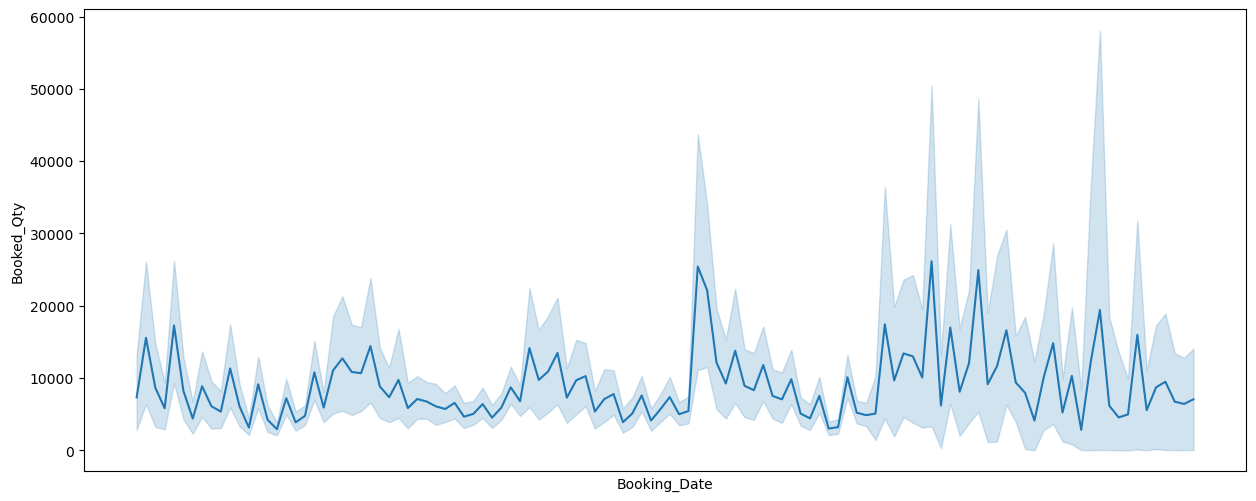

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
 
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
df_new = pd.read_csv('/kaggle/input/ciscodataset/PLID_Bookings_Problem1.csv')
df_utils_new=df_new[['Booking_Date','Booked_Qty']]
df_utils_new[:8]
fig=plt.figure(figsize=(15,6))
sns.lineplot(data=df_utils_new,x='Booking_Date',y='Booked_Qty')
plt.tick_params(
    axis='x',        
    which='both',   
    bottom=False,      
    top=False,        
    labelbottom=False) 
plt.show()

In [7]:
result=adfuller (df_utils_new['Booked_Qty'])
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\t%s: %.3f' %(key, value))

Test Statistic: -6.133621
p-value: 0.000000
Critical values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# Read the dataset from CSV file
df = pd.read_csv('inventory_data.csv')


df['Booking_Date'] = pd.to_datetime(df['Booking_Date'])
# Extract the year and month from Booking_Date
df['Year'] = df['Booking_Date'].dt.year
df['Month'] = df['Booking_Date'].dt.month
# Drop the Booking_Date column
df = df.drop('Booking_Date', axis=1)

# Create a dictionary to map the facility capacity to product demand
bins = {
    'XS': (0, 100),
    'S': (101, 250),
    'M': (251, 500),
    'L': (501, 1000),
    'XL': (1001, np.inf)
}

# Create a function to bin the demand values
def bin_demand(demand):
    for size, (lower, upper) in bins.items():
        if demand >= lower and demand <= upper:
            return size

# Split the dataset into training and testing sets
X = df.drop(['PLID', 'Booked_Qty'], axis=1)
y = df['Booked_Qty']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a decision tree classifier
clf = DecisionTreeClassifier()
# Train the classifier
clf.fit(X_train, y_train)
# Predict the demand for each product in the test set
y_pred = clf.predict(X_test)
# Bin the predicted demand values
y_pred_bins = [bin_demand(demand) for demand in y_pred]

# Evaluate the model's accuracy
accuracy = clf.score(X_test, y_test)
print(f"Model accuracy: {accuracy:.2f}")

In [ ]:
import pandas as pd
from statsmodels.tsa.forecasting.spaghetti import croston_model

# Load the data
data = pd.read_csv("inventory_data.csv")

# Subset the data for PLIDs with intermittent demand
intermittent_data = data.groupby('PLID').filter(lambda x: len(x[x['Booked_Qty']>0])/len(x) < 0.2)

# Create a dictionary to store the forecasts for each PLID
forecasts = {}

# Loop through each PLID and fit the Croston model
for plid in intermittent_data['PLID'].unique():
    plid_data = intermittent_data[intermittent_data['PLID']==plid]
    plid_data['Booking_Date'] = pd.to_datetime(plid_data['Booking_Date'])
    plid_data.set_index('Booking_Date', inplace=True)
    y = plid_data['Booked_Qty']
    model_fit = croston_model(y, model="Poisson")
    forecast = model_fit.forecast(1)
    forecasts[plid] = forecast

# Add the forecasts as a new column in the original data
data['Forecast'] = data['PLID'].map(forecasts)

# Print the data with the forecasts
print(data.head(20))